In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
train_clientes = pd.read_csv('train_clientes.csv')
train_requerimientos = pd.read_csv('train_requerimientos.csv')
test_clientes = pd.read_csv('test_clientes.csv')
test_requerimientos = pd.read_csv('test_requerimientos.csv')

In [17]:
train_clientes.shape

(70000, 53)

In [19]:
train_requerimientos.shape

(51417, 6)

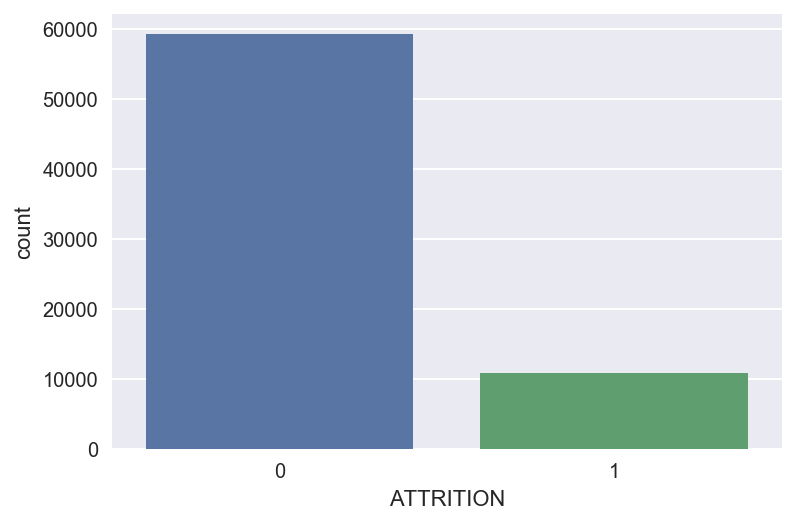

In [33]:
# Hay desbalance de 6:1 en la data
sns.countplot(train_clientes['ATTRITION'])

In [48]:
# Mínimo accuracy 84.54%
len(train_clientes[train_clientes['ATTRITION']==0]) / len(train_clientes)

0.8454

Text(0.5,1,'Tipo de requerimiento TEST')

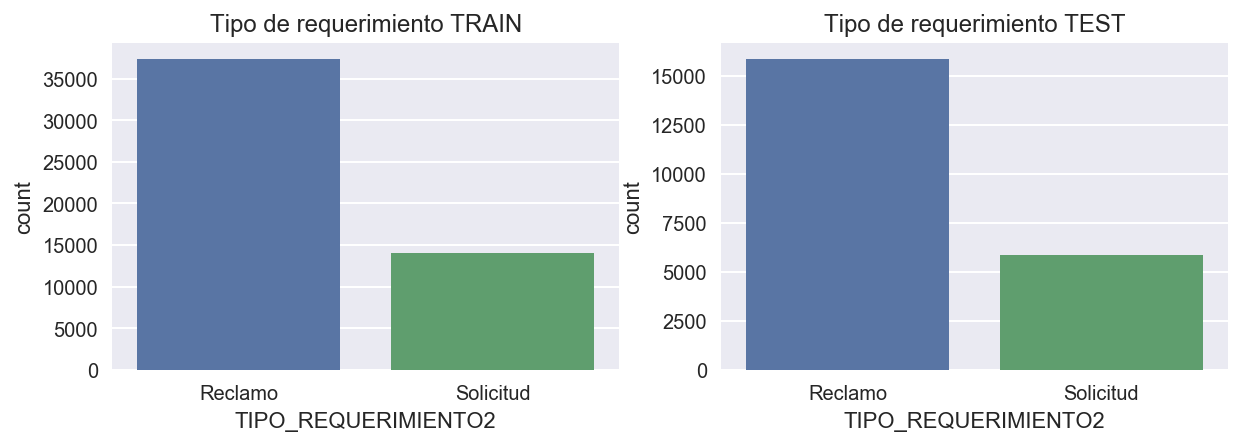

In [27]:
# Más de 2/3 de los requerimientos son reclamos
plt.subplots(ncols=2, figsize=(10,3))
plt.subplot(121)
ax = sns.countplot(train_requerimientos['TIPO_REQUERIMIENTO2'])
ax.set_title('Tipo de requerimiento TRAIN')
plt.subplot(122)
ax = sns.countplot(test_requerimientos['TIPO_REQUERIMIENTO2'])
ax.set_title('Tipo de requerimiento TEST')

Text(0.5,1,'Cantidad de requerimientos TEST')

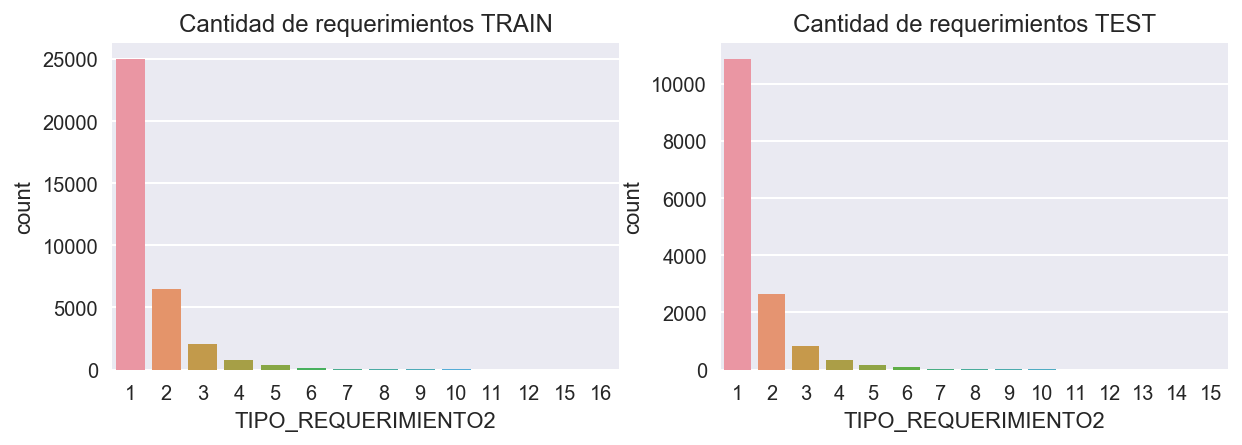

In [28]:
# La mayoría de los clientes presenta hasta dos requerimientos (reclamo/solicitud)
plt.subplots(ncols=2, figsize=(10,3))
plt.subplot(121)
ax = sns.countplot(train_requerimientos.groupby('ID_CORRELATIVO').agg('count')['TIPO_REQUERIMIENTO2'])
ax.set_title('Cantidad de requerimientos TRAIN')
plt.subplot(122)
ax = sns.countplot(test_requerimientos.groupby('ID_CORRELATIVO').agg('count')['TIPO_REQUERIMIENTO2'])
ax.set_title('Cantidad de requerimientos TEST')

Text(0.5,1,'Dictamen TEST')

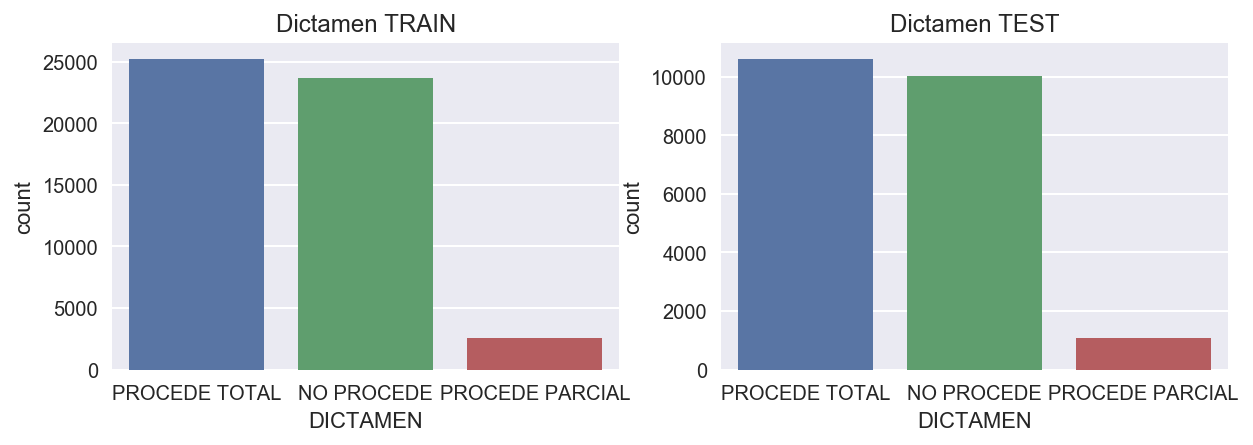

In [88]:
# La gran mayoria de los dictamenes procede totalmente o no procede
plt.subplots(ncols=2, figsize=(10,3))
plt.subplot(121)
ax = sns.countplot(train_requerimientos['DICTAMEN'],
                   order = test_requerimientos['DICTAMEN'].value_counts().index)
ax.set_title('Dictamen TRAIN')
plt.subplot(122)
ax = sns.countplot(test_requerimientos['DICTAMEN'],
                   order = test_requerimientos['DICTAMEN'].value_counts().index)
ax.set_title('Dictamen TEST')

Text(0.5,1,'Ubicacion TEST')

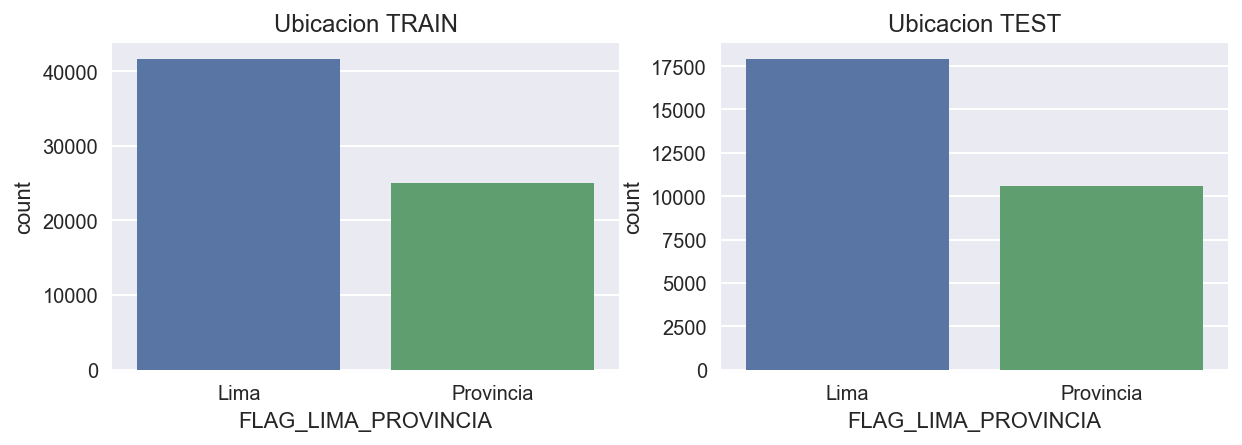

In [86]:
# 60% de los clientes son de Lima
plt.subplots(ncols=2, figsize=(10,3))
plt.subplot(121)
ax = sns.countplot(train_clientes['FLAG_LIMA_PROVINCIA'],
                   order = train_clientes['FLAG_LIMA_PROVINCIA'].value_counts().index)
ax.set_title('Ubicacion TRAIN')
plt.subplot(122)
ax = sns.countplot(test_clientes['FLAG_LIMA_PROVINCIA'],
                   order = train_clientes['FLAG_LIMA_PROVINCIA'].value_counts().index)
ax.set_title('Ubicacion TEST')

Text(0.5,1,'Ubicacion TEST')

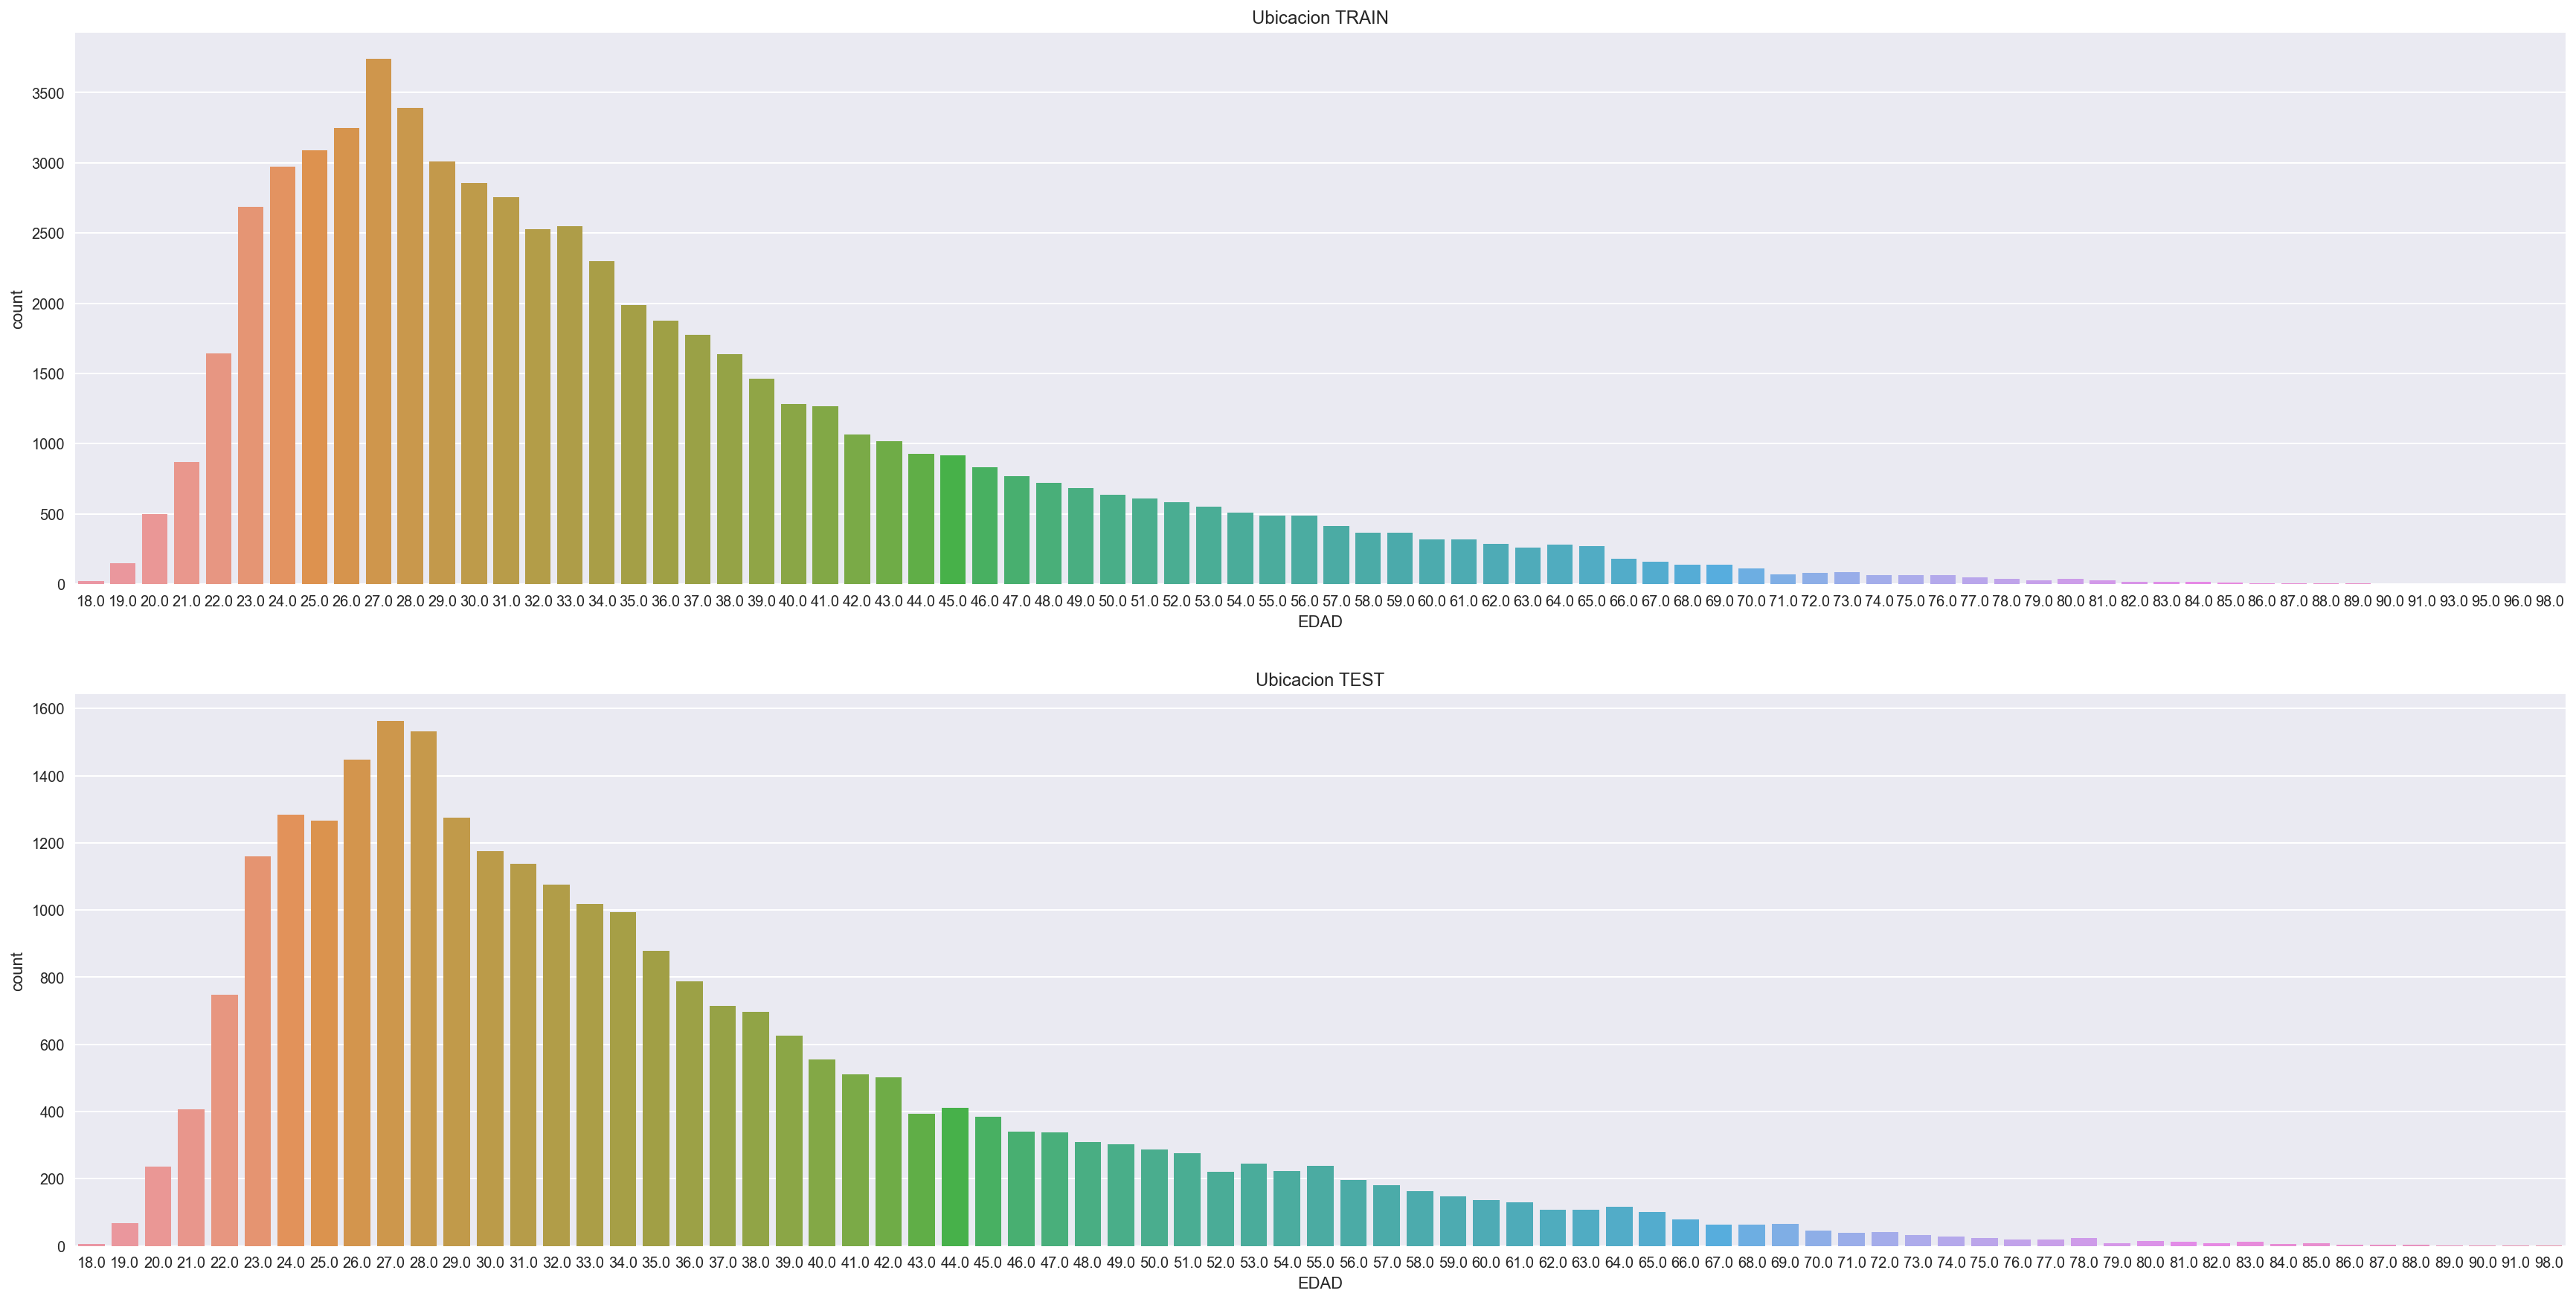

In [34]:
# La mayoría de personas tiene más de 23 años hasta ~40
plt.subplots(nrows=2, figsize=(30, 15))
plt.subplot(211)
ax = sns.countplot(train_clientes['EDAD'])
ax.set_title('Ubicacion TRAIN')
plt.subplot(212)
ax = sns.countplot(test_clientes['EDAD'])
ax.set_title('Ubicacion TEST')

## Null columns (train)

In [50]:
# Solo hay nulos en:
# RANG_INGRESO        (60583 / 70000: 86.54%)
# FLAG_LIMA_PROVINCIA (66614 / 70000: 95.16%)
# EDAD                (64674 / 70000: 92.39%)
# ANTIGUEDAD          (68238 / 70000: 97.48%)
# train_clientes.info()

In [39]:
# Hay solo un nulo en:
# DICTAMEN (1 / 51417)
# train_requerimientos.info()

## Null columns (test)

In [44]:
# Solo hay nulos en:
# RANG_INGRESO        (25862 / 30000: 86.21%)
# FLAG_LIMA_PROVINCIA (28487 / 30000: 94:96%)
# EDAD                (27649 / 30000: 92.16%)
# ANTIGUEDAD          (29254 / 30000: 97.51%)
# test_clientes.info()

In [45]:
# No hay nulos
# test_requerimientos.info()

## Column types

In [49]:
# LabelEncode TIPO_REQUERIMIENTO2: Reclamo / Solicitud                     (CAT) 
# Encode DICTAMEN: NO PROCEDE / PROCEDE TOTAL / PROCEDE PARCIAL *          (CAT) groupby count each cat
# Parse and encode PRODUCTO_SERVICIO_2: Producto 01 - Producto 23 (22, 20) (CAT) groupby count each cat
# Parse and encode SUBMOTIVO_2: Submotivo 05 - Submotivo 160 (85, 81)      (CAT ord?)
# Parse CODMES: 201203 - 201208                                            (NUM)
train_requerimientos.head(2)

,ID_CORRELATIVO,TIPO_REQUERIMIENTO2,DICTAMEN,CODMES,PRODUCTO_SERVICIO_2,SUBMOTIVO_2
0,64216,Reclamo,NO PROCEDE,201206,Producto 20,Submotivo 43
1,64216,Solicitud,NO PROCEDE,201205,Producto 20,Submotivo 157


Text(0.5,1,'Submotivos PROCEDE TOTAL - TEST')

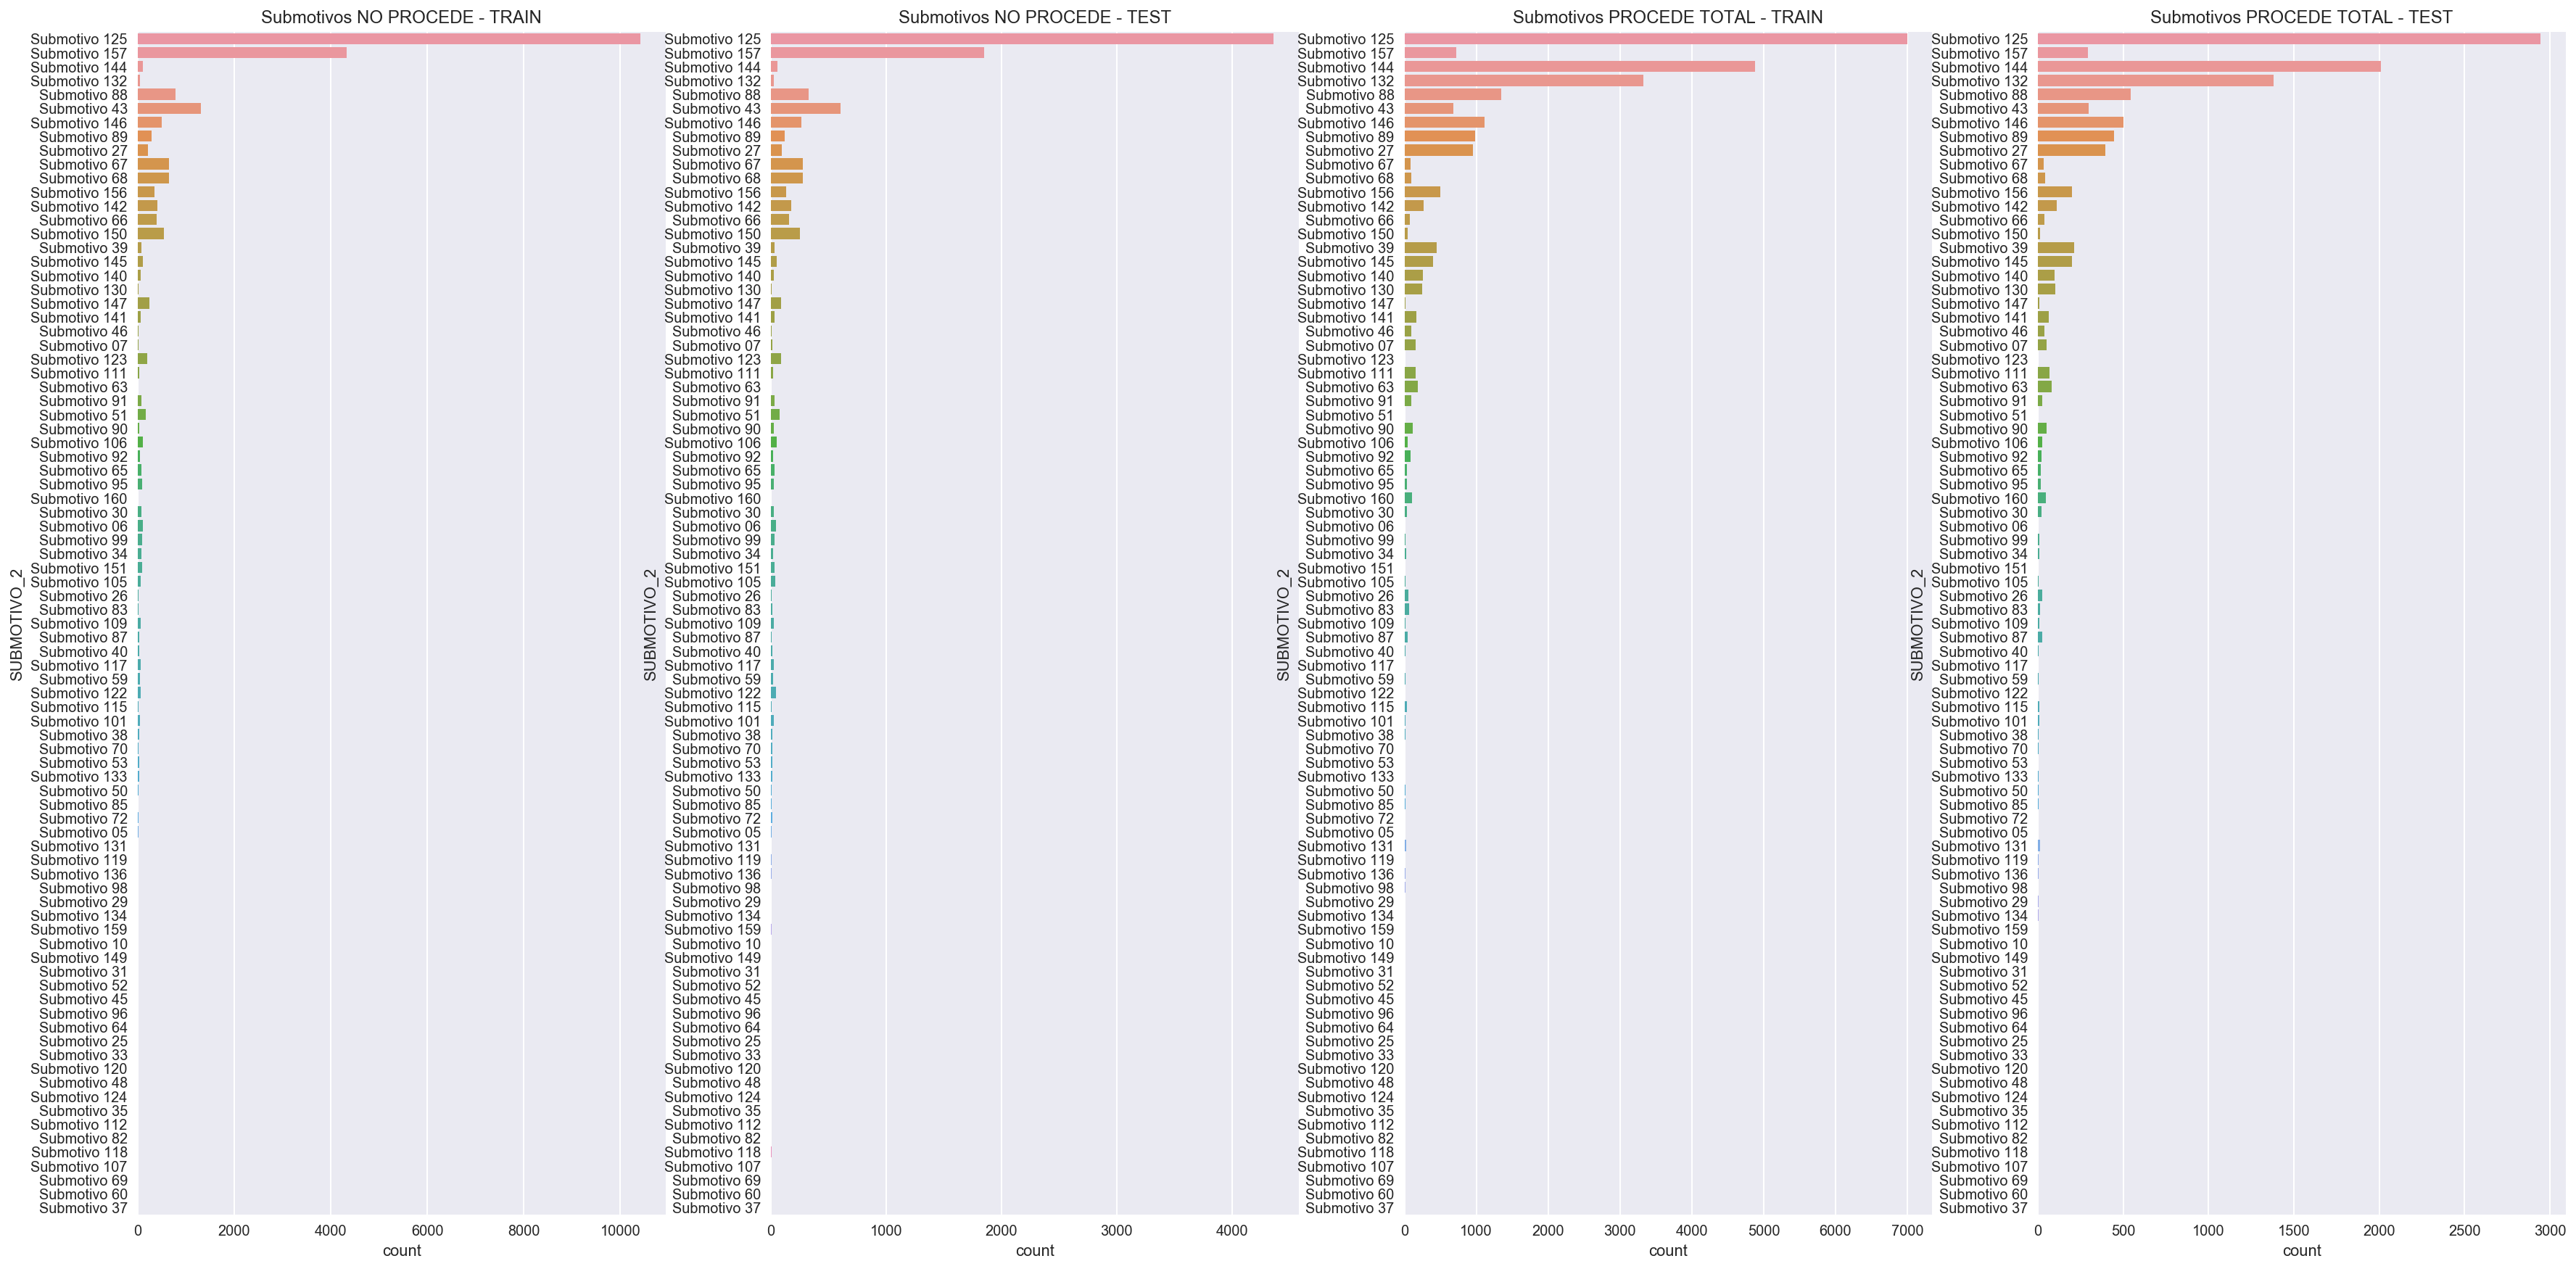

In [101]:
# Los submotivos 125, 144 y 132 son los mas frecuentes
# order_idx = pd.concat((train_requerimientos['SUBMOTIVO_2'], test_requerimientos['SUBMOTIVO_2'])).value_counts().index

plt.subplots(ncols=4, figsize=(30, 15))
plt.subplot(141)
ax = sns.countplot(y=train_requerimientos[train_requerimientos['DICTAMEN']=='NO PROCEDE']['SUBMOTIVO_2'], 
                   order = train_requerimientos['SUBMOTIVO_2'].value_counts().index)
ax.set_title('Submotivos NO PROCEDE - TRAIN')
plt.subplot(142)
ax = sns.countplot(y=test_requerimientos[test_requerimientos['DICTAMEN']=='NO PROCEDE']['SUBMOTIVO_2'], 
                   order = train_requerimientos['SUBMOTIVO_2'].value_counts().index)
ax.set_title('Submotivos NO PROCEDE - TEST')
plt.subplot(143)
ax = sns.countplot(y=train_requerimientos[train_requerimientos['DICTAMEN']=='PROCEDE TOTAL']['SUBMOTIVO_2'], 
                   order = train_requerimientos['SUBMOTIVO_2'].value_counts().index)
ax.set_title('Submotivos PROCEDE TOTAL - TRAIN')
plt.subplot(144)
ax = sns.countplot(y=test_requerimientos[test_requerimientos['DICTAMEN']=='PROCEDE TOTAL']['SUBMOTIVO_2'], 
                   order = train_requerimientos['SUBMOTIVO_2'].value_counts().index)
ax.set_title('Submotivos PROCEDE TOTAL - TEST')

In [73]:
def check_unique(col):
    print(sorted(train_clientes[col].dropna().apply(str).unique()))
    print(sorted(test_clientes[col].dropna().apply(str).unique()))

check_unique('CODMES')    

['201208']
['201208']


In [68]:
pd.set_option('display.max_columns', 500)

In [77]:
pd.concat((train_clientes.drop('ATTRITION', axis=1), test_clientes)).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID_CORRELATIVO,100000.0,50000.500000,28867.657797,1.0,25000.75,50000.5,75000.25,100000.0
CODMES,100000.0,201208.000000,0.000000,201208.0,201208.00,201208.0,201208.00,201208.0
FLG_BANCARIZADO,100000.0,0.837590,0.368828,0.0,1.00,1.0,1.00,1.0
EDAD,92323.0,35.217346,11.548247,18.0,27.00,32.0,41.00,98.0
ANTIGUEDAD,97492.0,2.534905,3.196190,0.0,0.00,0.0,5.00,23.0
SDO_ACTIVO_MENOS0,100000.0,9549.804000,97194.671234,0.0,0.00,0.0,0.00,11348500.0
SDO_ACTIVO_MENOS1,100000.0,9285.519100,96362.123628,0.0,0.00,0.0,0.00,11289560.0
SDO_ACTIVO_MENOS2,100000.0,8890.709600,94026.945648,0.0,0.00,0.0,0.00,11302990.0
SDO_ACTIVO_MENOS3,100000.0,8558.385300,92204.944542,0.0,0.00,0.0,0.00,10706290.0
SDO_ACTIVO_MENOS4,100000.0,8353.038400,87378.275006,0.0,0.00,0.0,0.00,10620280.0


In [69]:
# Drop CODMES: igual para todos
# Parse and encode RANG_INGRESO: Rang_ingreso_01 - Rang_ingreso_09   (ORD)
# Parse and encode FLAG_LIMA_PROVINCIA: Lima / Provincia             (CAT)
# Parse RANG_SDO_PASIVO_MENOS0: Cero - Rango_SDO_14                  (ORD)
# Parse RANG_NRO_PRODUCTOS_MENOS0: Rango_01 - Rango_06               (NUM)
train_clientes.head()

,ID_CORRELATIVO,CODMES,FLG_BANCARIZADO,RANG_INGRESO,FLAG_LIMA_PROVINCIA,EDAD,ANTIGUEDAD,ATTRITION,RANG_SDO_PASIVO_MENOS0,SDO_ACTIVO_MENOS0,SDO_ACTIVO_MENOS1,SDO_ACTIVO_MENOS2,SDO_ACTIVO_MENOS3,SDO_ACTIVO_MENOS4,SDO_ACTIVO_MENOS5,FLG_SEGURO_MENOS0,FLG_SEGURO_MENOS1,FLG_SEGURO_MENOS2,FLG_SEGURO_MENOS3,FLG_SEGURO_MENOS4,FLG_SEGURO_MENOS5,RANG_NRO_PRODUCTOS_MENOS0,FLG_NOMINA,NRO_ACCES_CANAL1_MENOS0,NRO_ACCES_CANAL1_MENOS1,NRO_ACCES_CANAL1_MENOS2,NRO_ACCES_CANAL1_MENOS3,NRO_ACCES_CANAL1_MENOS4,NRO_ACCES_CANAL1_MENOS5,NRO_ACCES_CANAL2_MENOS0,NRO_ACCES_CANAL2_MENOS1,NRO_ACCES_CANAL2_MENOS2,NRO_ACCES_CANAL2_MENOS3,NRO_ACCES_CANAL2_MENOS4,NRO_ACCES_CANAL2_MENOS5,NRO_ACCES_CANAL3_MENOS0,NRO_ACCES_CANAL3_MENOS1,NRO_ACCES_CANAL3_MENOS2,NRO_ACCES_CANAL3_MENOS3,NRO_ACCES_CANAL3_MENOS4,NRO_ACCES_CANAL3_MENOS5,NRO_ENTID_SSFF_MENOS0,NRO_ENTID_SSFF_MENOS1,NRO_ENTID_SSFF_MENOS2,NRO_ENTID_SSFF_MENOS3,NRO_ENTID_SSFF_MENOS4,NRO_ENTID_SSFF_MENOS5,FLG_SDO_OTSSFF_MENOS0,FLG_SDO_OTSSFF_MENOS1,FLG_SDO_OTSSFF_MENOS2,FLG_SDO_OTSSFF_MENOS3,FLG_SDO_OTSSFF_MENOS4,FLG_SDO_OTSSFF_MENOS5
0,35653,201208,1,Rang_ingreso_06,Lima,25.0,6.0,0,Rango_SDO_09,0,0,0,0,0,0,1,1,1,1,1,1,Rango_04,0,2,1,0,2,4,1,8,11,14,12,8,12,3,0,1,6,2,5,2,1,1,1,1,1,1,0,0,0,0,0
1,66575,201208,1,Rang_ingreso_03,Provincia,27.0,0.0,0,Rango_SDO_01,0,0,0,0,0,0,0,0,0,0,0,0,Rango_02,1,0,0,0,0,0,0,0,0,0,0,0,0,24,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0
2,56800,201208,1,Rang_ingreso_01,Provincia,34.0,4.0,0,Rango_SDO_02,0,0,0,0,0,0,0,0,0,0,0,0,Rango_02,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,2,0,0,0,0,0,0,0,0,0,0,0,0
3,8410,201208,1,Rang_ingreso_04,Provincia,63.0,5.0,0,Rango_SDO_03,0,0,0,0,0,0,1,1,1,1,1,1,Rango_03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2,0,3,3,3,3,3,3,1,1,1,1,1,1
4,6853,201208,1,NaN,Lima,25.0,0.0,0,Rango_SDO_01,0,0,0,0,0,0,0,0,0,0,0,0,Rango_01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Preprocessing

In [ ]:
# Solo hay nulos en:
# RANG_INGRESO        (60583 / 70000: 86.54%)
# FLAG_LIMA_PROVINCIA (66614 / 70000: 95.16%)
# EDAD                (64674 / 70000: 92.39%)
# ANTIGUEDAD          (68238 / 70000: 97.48%)
# train_clientes.info()

# Hay solo un nulo en:
# DICTAMEN (1 / 51417)
# train_requerimientos.info()

In [103]:
# LabelEncode TIPO_REQUERIMIENTO2: Reclamo / Solicitud                     (CAT) 
# Encode DICTAMEN: NO PROCEDE / PROCEDE TOTAL / PROCEDE PARCIAL *          (CAT) groupby count each cat *
# Parse and encode PRODUCTO_SERVICIO_2: Producto 01 - Producto 23 (22, 20) (CAT) groupby count each cat
# Parse and encode SUBMOTIVO_2: Submotivo 05 - Submotivo 160 (85, 81)      (CAT ord?) 
# Parse CODMES: 201203 - 201208                                            (NUM) groupby count each cat
#### train_requerimientos.head(2)

# Drop CODMES: igual para todos
# Parse and encode RANG_INGRESO: Rang_ingreso_01 - Rang_ingreso_09   (ORD) *
# Parse and encode FLAG_LIMA_PROVINCIA: Lima / Provincia             (CAT) *
# Parse RANG_SDO_PASIVO_MENOS0: Cero - Rango_SDO_14                  (ORD)
# Parse RANG_NRO_PRODUCTOS_MENOS0: Rango_01 - Rango_06               (NUM)
#### train_clientes.head()

In [104]:
def encode_category(series, categories):
    '''Encodes series categories based on a list or a dictionary and returns the series encoded'''
    if type(categories) is list:
        return pd.Categorical(series, categories).codes
    return series.map(categories)

In [120]:
train = train_clientes.copy()
test = test_clientes.copy()

In [122]:
# Drop CODMES: igual para todos
train = train.drop('CODMES', axis=1)
test = test.drop('CODMES', axis=1)

In [121]:
# Parse and encode RANG_INGRESO: Rang_ingreso_01 - Rang_ingreso_09   (ORD) *
RANG_INGRESO_labels = list(sorted(pd.concat((train['RANG_INGRESO'], 
                                             test['RANG_INGRESO'])).dropna().apply(str).unique()))
train['RANG_INGRESO'] = encode_category(train['RANG_INGRESO'], RANG_INGRESO_labels)
test['RANG_INGRESO'] = encode_category(test['RANG_INGRESO'], RANG_INGRESO_labels)

In [125]:
# Parse and encode FLAG_LIMA_PROVINCIA: Lima / Provincia             (CAT) *
FLAG_LIMA_PROVINCIA_labels = list(sorted(pd.concat((train['FLAG_LIMA_PROVINCIA'], 
                                             test['FLAG_LIMA_PROVINCIA'])).dropna().apply(str).unique()))
train['FLAG_LIMA_PROVINCIA'] = encode_category(train['FLAG_LIMA_PROVINCIA'], FLAG_LIMA_PROVINCIA_labels)
test['FLAG_LIMA_PROVINCIA'] = encode_category(test['FLAG_LIMA_PROVINCIA'], FLAG_LIMA_PROVINCIA_labels)

In [129]:
# Parse RANG_SDO_PASIVO_MENOS0: Cero - Rango_SDO_14                  (ORD)
RANG_SDO_PASIVO_MENOS0_labels = list(sorted(pd.concat((train['RANG_SDO_PASIVO_MENOS0'], 
                                             test['RANG_SDO_PASIVO_MENOS0'])).dropna().apply(str).unique()))
train['RANG_SDO_PASIVO_MENOS0'] = encode_category(train['RANG_SDO_PASIVO_MENOS0'], RANG_SDO_PASIVO_MENOS0_labels)
test['RANG_SDO_PASIVO_MENOS0'] = encode_category(test['RANG_SDO_PASIVO_MENOS0'], RANG_SDO_PASIVO_MENOS0_labels)

In [131]:
# Parse RANG_NRO_PRODUCTOS_MENOS0: Rango_01 - Rango_06               (NUM)
RANG_NRO_PRODUCTOS_MENOS0_labels = list(sorted(pd.concat((train['RANG_NRO_PRODUCTOS_MENOS0'], 
                                             test['RANG_NRO_PRODUCTOS_MENOS0'])).dropna().apply(str).unique()))
train['RANG_NRO_PRODUCTOS_MENOS0'] = encode_category(train['RANG_NRO_PRODUCTOS_MENOS0'], RANG_NRO_PRODUCTOS_MENOS0_labels)
test['RANG_NRO_PRODUCTOS_MENOS0'] = encode_category(test['RANG_NRO_PRODUCTOS_MENOS0'], RANG_NRO_PRODUCTOS_MENOS0_labels)

In [132]:
train.head()

,ID_CORRELATIVO,FLG_BANCARIZADO,RANG_INGRESO,FLAG_LIMA_PROVINCIA,EDAD,ANTIGUEDAD,ATTRITION,RANG_SDO_PASIVO_MENOS0,SDO_ACTIVO_MENOS0,SDO_ACTIVO_MENOS1,SDO_ACTIVO_MENOS2,SDO_ACTIVO_MENOS3,SDO_ACTIVO_MENOS4,SDO_ACTIVO_MENOS5,FLG_SEGURO_MENOS0,FLG_SEGURO_MENOS1,FLG_SEGURO_MENOS2,FLG_SEGURO_MENOS3,FLG_SEGURO_MENOS4,FLG_SEGURO_MENOS5,RANG_NRO_PRODUCTOS_MENOS0,FLG_NOMINA,NRO_ACCES_CANAL1_MENOS0,NRO_ACCES_CANAL1_MENOS1,NRO_ACCES_CANAL1_MENOS2,NRO_ACCES_CANAL1_MENOS3,NRO_ACCES_CANAL1_MENOS4,NRO_ACCES_CANAL1_MENOS5,NRO_ACCES_CANAL2_MENOS0,NRO_ACCES_CANAL2_MENOS1,NRO_ACCES_CANAL2_MENOS2,NRO_ACCES_CANAL2_MENOS3,NRO_ACCES_CANAL2_MENOS4,NRO_ACCES_CANAL2_MENOS5,NRO_ACCES_CANAL3_MENOS0,NRO_ACCES_CANAL3_MENOS1,NRO_ACCES_CANAL3_MENOS2,NRO_ACCES_CANAL3_MENOS3,NRO_ACCES_CANAL3_MENOS4,NRO_ACCES_CANAL3_MENOS5,NRO_ENTID_SSFF_MENOS0,NRO_ENTID_SSFF_MENOS1,NRO_ENTID_SSFF_MENOS2,NRO_ENTID_SSFF_MENOS3,NRO_ENTID_SSFF_MENOS4,NRO_ENTID_SSFF_MENOS5,FLG_SDO_OTSSFF_MENOS0,FLG_SDO_OTSSFF_MENOS1,FLG_SDO_OTSSFF_MENOS2,FLG_SDO_OTSSFF_MENOS3,FLG_SDO_OTSSFF_MENOS4,FLG_SDO_OTSSFF_MENOS5
0,35653,1,5,0,25.0,6.0,0,9,0,0,0,0,0,0,1,1,1,1,1,1,3,0,2,1,0,2,4,1,8,11,14,12,8,12,3,0,1,6,2,5,2,1,1,1,1,1,1,0,0,0,0,0
1,66575,1,2,1,27.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,24,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0
2,56800,1,0,1,34.0,4.0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,2,0,0,0,0,0,0,0,0,0,0,0,0
3,8410,1,3,1,63.0,5.0,0,3,0,0,0,0,0,0,1,1,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2,0,3,3,3,3,3,3,1,1,1,1,1,1
4,6853,1,-1,0,25.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [133]:
test.head()

,ID_CORRELATIVO,FLG_BANCARIZADO,RANG_INGRESO,FLAG_LIMA_PROVINCIA,EDAD,ANTIGUEDAD,RANG_SDO_PASIVO_MENOS0,SDO_ACTIVO_MENOS0,SDO_ACTIVO_MENOS1,SDO_ACTIVO_MENOS2,SDO_ACTIVO_MENOS3,SDO_ACTIVO_MENOS4,SDO_ACTIVO_MENOS5,FLG_SEGURO_MENOS0,FLG_SEGURO_MENOS1,FLG_SEGURO_MENOS2,FLG_SEGURO_MENOS3,FLG_SEGURO_MENOS4,FLG_SEGURO_MENOS5,RANG_NRO_PRODUCTOS_MENOS0,FLG_NOMINA,NRO_ACCES_CANAL1_MENOS0,NRO_ACCES_CANAL1_MENOS1,NRO_ACCES_CANAL1_MENOS2,NRO_ACCES_CANAL1_MENOS3,NRO_ACCES_CANAL1_MENOS4,NRO_ACCES_CANAL1_MENOS5,NRO_ACCES_CANAL2_MENOS0,NRO_ACCES_CANAL2_MENOS1,NRO_ACCES_CANAL2_MENOS2,NRO_ACCES_CANAL2_MENOS3,NRO_ACCES_CANAL2_MENOS4,NRO_ACCES_CANAL2_MENOS5,NRO_ACCES_CANAL3_MENOS0,NRO_ACCES_CANAL3_MENOS1,NRO_ACCES_CANAL3_MENOS2,NRO_ACCES_CANAL3_MENOS3,NRO_ACCES_CANAL3_MENOS4,NRO_ACCES_CANAL3_MENOS5,NRO_ENTID_SSFF_MENOS0,NRO_ENTID_SSFF_MENOS1,NRO_ENTID_SSFF_MENOS2,NRO_ENTID_SSFF_MENOS3,NRO_ENTID_SSFF_MENOS4,NRO_ENTID_SSFF_MENOS5,FLG_SDO_OTSSFF_MENOS0,FLG_SDO_OTSSFF_MENOS1,FLG_SDO_OTSSFF_MENOS2,FLG_SDO_OTSSFF_MENOS3,FLG_SDO_OTSSFF_MENOS4,FLG_SDO_OTSSFF_MENOS5
0,47411,0,2,-1,NaN,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,53,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,39861,1,2,1,37.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,2,2,2,2,2,2,0,0,0,0,0,1
2,38898,1,3,0,26.0,4.0,4,0,0,0,0,0,0,1,1,1,1,1,1,2,1,0,0,0,0,0,0,6,1,0,0,0,0,13,11,13,11,12,13,3,3,3,3,3,3,1,1,1,1,1,1
3,50927,1,1,0,34.0,4.0,7,0,0,0,0,0,0,1,1,1,1,0,0,2,0,0,0,0,1,1,0,6,7,10,6,8,10,6,7,6,9,6,2,1,1,1,1,0,0,0,0,0,0,0,0
4,32969,1,2,0,22.0,2.0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Modeling

In [147]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import time
import winsound

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, log_loss
from sklearn.model_selection import StratifiedKFold

In [137]:
kfolds = StratifiedKFold(shuffle=True, random_state=1)

In [148]:
def run_model(model, X, y):
    model_name = str(model.__class__).split('.')[-1].replace('>','').replace("'",'')
    print(model_name)
    accuracy = []
    f1 = []
    auc = []
    logloss = []
    start = int(time.time() * 1000)
    for train_idx, test_idx in kfolds.split(X, y):
        model.fit(X.iloc[train_idx,:], y[train_idx])
        y_ = model.predict(X.iloc[test_idx,:])
        accuracy += [accuracy_score(y.iloc[test_idx], y_)]
        f1 += [f1_score(y.iloc[test_idx], y_)]
        auc += [roc_auc_score(y.iloc[test_idx], y_)]
        logloss += [log_loss(y.iloc[test_idx], y_)]
    end = int(time.time() * 1000)
    results.loc[len(results)] = [model_name, np.mean(accuracy), np.std(accuracy), 
                                 np.mean(f1), np.std(f1),
                                 np.mean(auc), np.std(auc), 
                                 np.mean(logloss), np.std(logloss), str(end - start)]
    winsound.Beep(2500, 1000)

In [149]:
results = pd.DataFrame(columns=['model', 'accuracy', 'accuracy-std', 'f1-score', 'f1-score-std', 
                                'aucroc', 'aucroc-std', 'logloss', 'logloss-std', 'time'])

In [ ]:
run_model(XGBClassifier(), train.drop(['ID_CORRELATIVO', 'ATTRITION'], axis=1), train['ATTRITION'])

In [ ]:
run_model(LGBMClassifier(), train.drop(['ID_CORRELATIVO', 'ATTRITION'], axis=1), train['ATTRITION'])

In [ ]:
run_model(CatBoostClassifier(), train.drop(['ID_CORRELATIVO', 'ATTRITION'], axis=1), train['ATTRITION'])

In [154]:
results

,model,accuracy,accuracy-std,f1-score,f1-score-std,aucroc,aucroc-std,logloss,logloss-std,time
0,XGBClassifier,0.872071,0.000393,0.413881,0.004304,0.635150,0.002001,4.418511,0.013572,24861
1,LGBMClassifier,0.876386,0.001123,0.481487,0.007929,0.670094,0.005204,4.269507,0.038777,1674
2,CatBoostClassifier,0.879357,0.000520,0.482438,0.006846,0.668718,0.003847,4.166874,0.017965,144761


In [155]:
results.to_csv('results.csv', index=False)

In [145]:
train.to_csv('train_preprocessed.csv', index=False)
test.to_csv('test_preprocessed.csv', index=False)

## Testing Params

In [163]:
results.loc[len(results)] = ['TESTING_PARAMS'] + [0] * 9
results

,model,accuracy,accuracy-std,f1-score,f1-score-std,aucroc,aucroc-std,logloss,logloss-std,time
0,XGBClassifier,0.872071,0.000393,0.413881,0.004304,0.635150,0.002001,4.418511,0.013572,24861
1,LGBMClassifier,0.876386,0.001123,0.481487,0.007929,0.670094,0.005204,4.269507,0.038777,1674
2,CatBoostClassifier,0.879357,0.000520,0.482438,0.006846,0.668718,0.003847,4.166874,0.017965,144761
3,TESTING_PARAMS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [164]:
run_model(XGBClassifier(
                 min_child_weight=10,
                 max_depth=7,
                 max_delta_step=1.8,
                 colsample_bytree=0.4,
                 subsample=0.8,
                 eta=0.025,
                 gamma=0.65,
                 num_boost_round=700                 
            ), 
          train.drop(['ID_CORRELATIVO', 'ATTRITION'], axis=1), train['ATTRITION'])
results

XGBClassifier


,model,accuracy,accuracy-std,f1-score,f1-score-std,aucroc,aucroc-std,logloss,logloss-std,time
0,XGBClassifier,0.872071,0.000393,0.413881,0.004304,0.635150,0.002001,4.418511,0.013572,24861
1,LGBMClassifier,0.876386,0.001123,0.481487,0.007929,0.670094,0.005204,4.269507,0.038777,1674
2,CatBoostClassifier,0.879357,0.000520,0.482438,0.006846,0.668718,0.003847,4.166874,0.017965,144761
3,TESTING_PARAMS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,XGBClassifier,0.880171,0.000859,0.484674,0.003495,0.669501,0.002300,4.138749,0.029675,31504


In [165]:
run_model(XGBClassifier(
                n_estimators=400,
                max_depth=4,
                learning_rate=0.07,
                subsample=.8,
                min_child_weight=6,
                colsample_bytree=.8,
                scale_pos_weight=1.6,
                gamma=10,
                reg_alpha=8,
                reg_lambda=1.3,
            ), 
          train.drop(['ID_CORRELATIVO', 'ATTRITION'], axis=1), train['ATTRITION'])
results

XGBClassifier


,model,accuracy,accuracy-std,f1-score,f1-score-std,aucroc,aucroc-std,logloss,logloss-std,time
0,XGBClassifier,0.872071,0.000393,0.413881,0.004304,0.635150,0.002001,4.418511,0.013572,24861
1,LGBMClassifier,0.876386,0.001123,0.481487,0.007929,0.670094,0.005204,4.269507,0.038777,1674
2,CatBoostClassifier,0.879357,0.000520,0.482438,0.006846,0.668718,0.003847,4.166874,0.017965,144761
3,TESTING_PARAMS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,XGBClassifier,0.880171,0.000859,0.484674,0.003495,0.669501,0.002300,4.138749,0.029675,31504
5,XGBClassifier,0.874900,0.001844,0.535230,0.003263,0.707799,0.001611,4.320834,0.063708,113529


In [167]:
results.to_csv('results.csv', index=False)

## Augmenting dataset

In [146]:
# LabelEncode TIPO_REQUERIMIENTO2: Reclamo / Solicitud                     (CAT) 
# Encode DICTAMEN: NO PROCEDE / PROCEDE TOTAL / PROCEDE PARCIAL *          (CAT) groupby count each cat *
# Parse and encode PRODUCTO_SERVICIO_2: Producto 01 - Producto 23 (22, 20) (CAT) groupby count each cat
# Parse and encode SUBMOTIVO_2: Submotivo 05 - Submotivo 160 (85, 81)      (CAT ord?) 
# Parse CODMES: 201203 - 201208                                            (NUM) groupby count each cat
#### train_requerimientos.head(2)

In [162]:
results = pd.read_csv('results.csv')

In [160]:
results.loc[len(results)] = ['AUGMENTED_DATASET'] + [0] * 9

In [161]:
results

,model,accuracy,accuracy-std,f1-score,f1-score-std,aucroc,aucroc-std,logloss,logloss-std,time
0,XGBClassifier,0.872071,0.000393,0.413881,0.004304,0.635150,0.002001,4.418511,0.013572,24861
1,LGBMClassifier,0.876386,0.001123,0.481487,0.007929,0.670094,0.005204,4.269507,0.038777,1674
2,CatBoostClassifier,0.879357,0.000520,0.482438,0.006846,0.668718,0.003847,4.166874,0.017965,144761
3,AUGMENTED_DATASET,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
